In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [18]:
dt_fchek= pd.read_csv('C:\\Users\\sathya\\Documents\\assignments\\Fraud_check.csv')

In [19]:
dt_fchek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
dt_fchek.head(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES


In [8]:
dt_fchek.tail(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [11]:
dt_fchek.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [20]:

dt_fchek.loc[dt_fchek["Taxable.Income"]>=30000,"Income"]="Good"
dt_fchek.loc[dt_fchek["Taxable.Income"]<=30000,"Income"]="Risky"

In [21]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in dt_fchek.columns:
    if dt_fchek[column_name].dtype == object:
        dt_fchek[column_name] = le.fit_transform(dt_fchek[column_name])
    else:
        pass

In [22]:
dt_fchek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   Income           600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [23]:
#Droping the Taxable income variable - we taken that as Income description
dt_fchek.drop(["Taxable.Income"],axis=1,inplace=True)

In [24]:
## Collecting the column names
colnames = list(dt_fchek.columns)
colnames

['Undergrad',
 'Marital.Status',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Income']

In [26]:
x= dt_fchek.iloc[:,0:5]
y= dt_fchek.iloc[:,5]


In [27]:
print(x)

     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0            0               2            50047               10      1
1            1               0           134075               18      1
2            0               1           160205               30      1
3            1               2           193264               15      1
4            0               1            27533               28      0
..         ...             ...              ...              ...    ...
595          1               0            39492                7      1
596          1               0            55369                2      1
597          0               0           154058                0      1
598          1               1           180083               17      0
599          0               0           158137               16      0

[600 rows x 5 columns]


In [29]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Income, Length: 600, dtype: int32


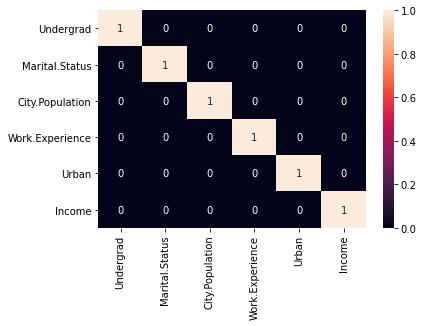

In [31]:
import seaborn as sns
sns.heatmap(dt_fchek.corr()>0.6, annot = True)
plt.show()

In [ ]:
# NO CORRELATION BETWEEN ANY GIVEN COLUMN

In [34]:
# Splitting data into train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify =y, random_state = 10)

In [35]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
453,1,2,41504,26,0
500,1,2,158780,11,1
173,1,2,105110,16,1
569,1,2,38074,12,1
282,1,1,59590,29,0
...,...,...,...,...,...
250,0,1,156973,16,0
213,1,2,107069,13,0
330,0,1,43176,29,0
482,0,2,125771,12,0


In [36]:
y_train

453    0
500    0
173    0
569    0
282    0
      ..
250    0
213    0
330    0
482    0
517    1
Name: Income, Length: 480, dtype: int32

In [37]:
pd.value_counts(y_train.values.flatten())

0    381
1     99
dtype: int64

In [39]:
pd.value_counts(y_test.values.flatten())

0    95
1    25
dtype: int64

In [41]:
pd.value_counts(x_train.values.flatten())

1         656
0         631
2         193
10         26
13         25
         ... 
94875       1
121506      1
193193      1
70323       1
100347      1
Length: 511, dtype: int64

In [42]:
# feature scaling
from sklearn.preprocessing import StandardScaler

st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [43]:

from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion='entropy', random_state= 10)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [44]:
model1.score(x_train, y_train)

1.0

In [45]:
model1.score(x_test, y_test)

0.5833333333333334

In [46]:
model1.feature_importances_

array([0.0576065 , 0.08418994, 0.58349033, 0.2249125 , 0.04980073])

In [47]:
y_pred = model1.predict(x_test)

In [48]:
#Here first column is for 'Good', & second is for 'Risky'
model1.predict_proba(x_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [49]:
# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

array([[66, 29],
       [21,  4]], dtype=int64)

In [50]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model1 = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 10)
    model1.fit(x_train, y_train)
    train_accuracy.append(model1.score(x_train, y_train))
    test_accuracy.append(model1.score(x_test, y_test))

In [52]:
dt_fchek2 = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})

In [53]:
dt_fchek2

,max_depth,train_acc,test_acc
0,1,0.793750,0.791667
1,2,0.795833,0.783333
2,3,0.795833,0.783333
3,4,0.795833,0.783333
4,5,0.804167,0.783333
5,6,0.816667,0.733333
6,7,0.822917,0.741667
7,8,0.831250,0.758333
8,9,0.858333,0.741667
9,10,0.875000,0.750000


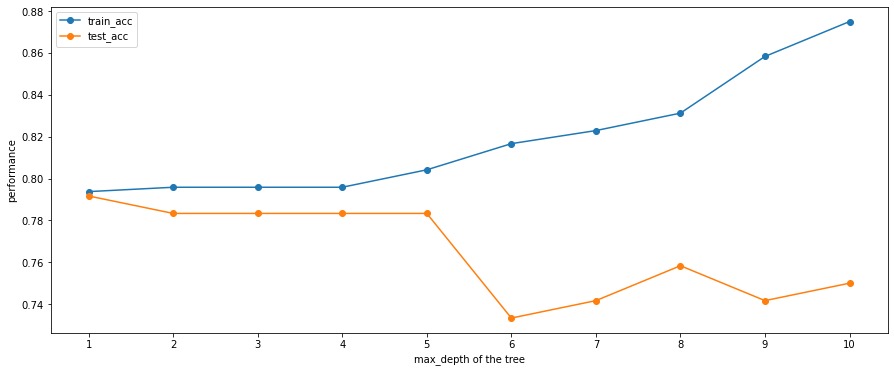

In [54]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(dt_fchek2['max_depth'],dt_fchek2['train_acc'], marker = 'o')
plt.plot(dt_fchek2['max_depth'], dt_fchek2['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

In [55]:
# Model Building
def hyper_tuned_model(criterion,max_depth, x_train, y_train, x_test, y_test):
    model1 = DecisionTreeClassifier(criterion=criterion, random_state=10, max_depth=max_depth)
    print(model1.fit(x_train, y_train))
    print('train_score:',model1.score(x_train, y_train))
    print('test_score:',model1.score(x_test, y_test))

In [65]:
y_pred = model1.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [63]:
# Building Decision Tree suing CART
def grid_search_cv(x_train, y_train,cv =3):

    from sklearn.model_selection import GridSearchCV
    from sklearn.tree import DecisionTreeClassifier

    model2 =DecisionTreeClassifier()
    param_grid= {'criterion':['gini','entropy'],'splitter':['best'],'max_depth':[i for i in range(1,6)],\
                 'min_samples_split':[i for i in range(2,4)],\
                 'min_samples_leaf':[1,2,3],\
                 'max_features':[i for i in range(5,11)],'random_state':[10]}


    grid_search = GridSearchCV(estimator=model2, param_grid =param_grid,\
                               verbose=0, n_jobs=-1, scoring='accuracy', cv = 3)
    
    result = grid_search.fit(x_train, y_train)
    best_parameters =result.best_params_
    best_score = grid_search.best_score_
    
    print('best_param', best_parameters)
    print()
    print('best_score', best_score)

In [64]:
grid_search_cv(x_train, y_train)

best_param {'criterion': 'gini', 'max_depth': 1, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 10, 'splitter': 'best'}

best_score 0.7937499999999998
